In [1]:
using ReinforcementLearning, ReinforcementLearningEnvironments

In [2]:
using RLIntro
using RLIntro.BlackJack

In [3]:
env = BlackJackEnv(;is_exploring_start=true)

ns, na = length(observation_space(env)), length(action_space(env))

(220, 2)

In [4]:
agent = Agent(
    π=ExploringStartPolicy(
        π=QBasedPolicy(
            learner=MonteCarloLearner(
                approximator=TabularQApproximator(;n_state=ns, n_action=na),
                kind=EVERY_VISIT),
            selector=EpsilonGreedySelector(0.)
        ),
        actions=1:na
    ),
    buffer=episode_RTSA_buffer()
);

run(agent, env, StopAfterEpisode(1000000; is_show_progress=false))

EmptyHook()

In [5]:
using Plots

In [6]:
q_value = reshape(agent.π.π.learner.approximator.table, 2, 11, 10, 2)
p1 = map(x -> x.I[3], argmax(q_value[1, :, :, :], dims=3))
p2 = map(x -> x.I[3], argmax(q_value[2, :, :, :], dims=3));

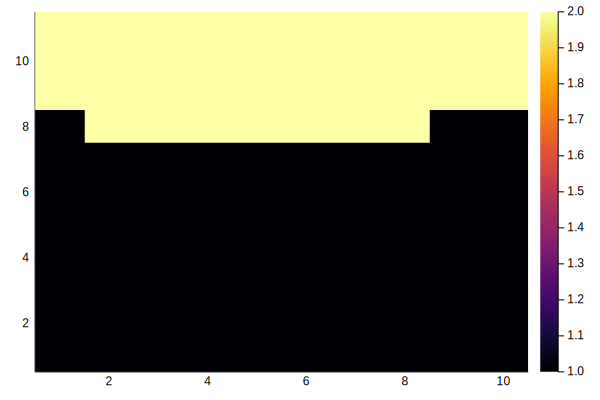

In [7]:
heatmap(dropdims(p1, dims=3))

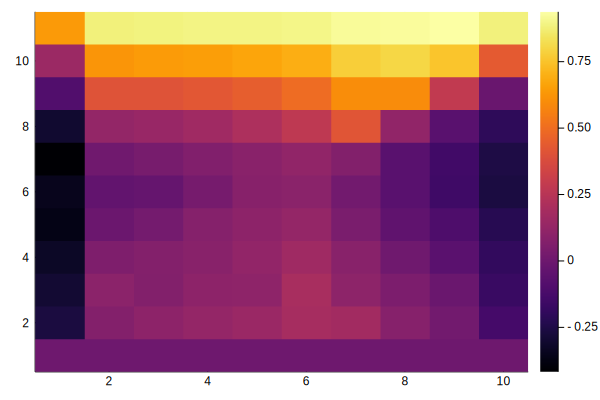

In [8]:
heatmap(dropdims(maximum(q_value[1, :, :, :]; dims=3), dims=3))

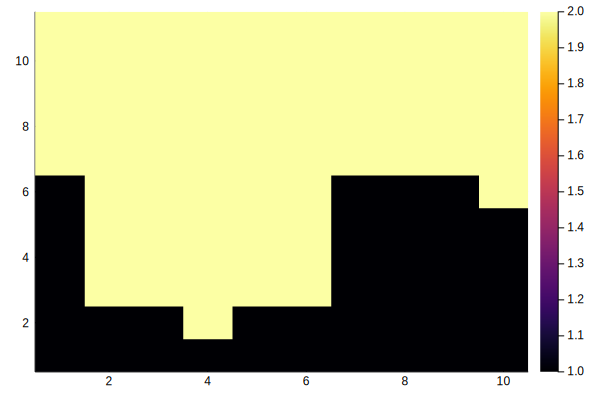

In [9]:
heatmap(dropdims(p2, dims=3))

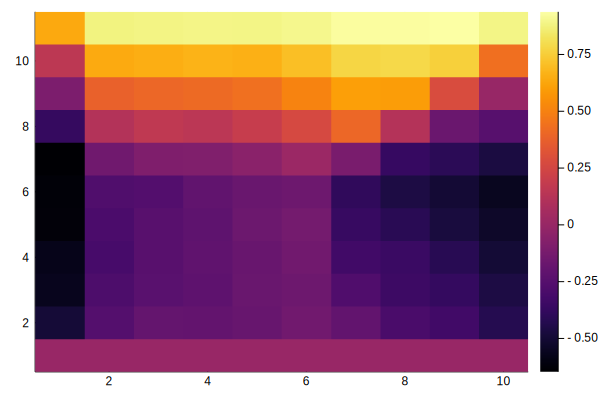

In [10]:
heatmap(dropdims(maximum(q_value[2, :, :, :]; dims=3), dims=3))